## Digit Recognizer

### Importing Essential Packages 📦🔍

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import random
from tensorflow.keras import layers, models

### Importing data 📦📦

In [2]:
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')
submission = pd.read_csv('../data/sample_submission.csv')

In [3]:
train_df.shape, test_df.shape, submission.shape

((42000, 785), (28000, 784), (28000, 2))

In [4]:
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
submission.head()

,ImageId,Label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


In [9]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   ImageId  28000 non-null  int64
 1   Label    28000 non-null  int64
dtypes: int64(2)
memory usage: 437.6 KB


### Creating Images from Numbers 📸🔢

In [10]:
number = random.randint(0, 42000) 
number

1653

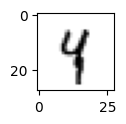

In [11]:
plt.figure(figsize=(1, 1))
plt.imshow(train_df.iloc[number, 1:].values.reshape(28, 28), cmap=plt.cm.binary)

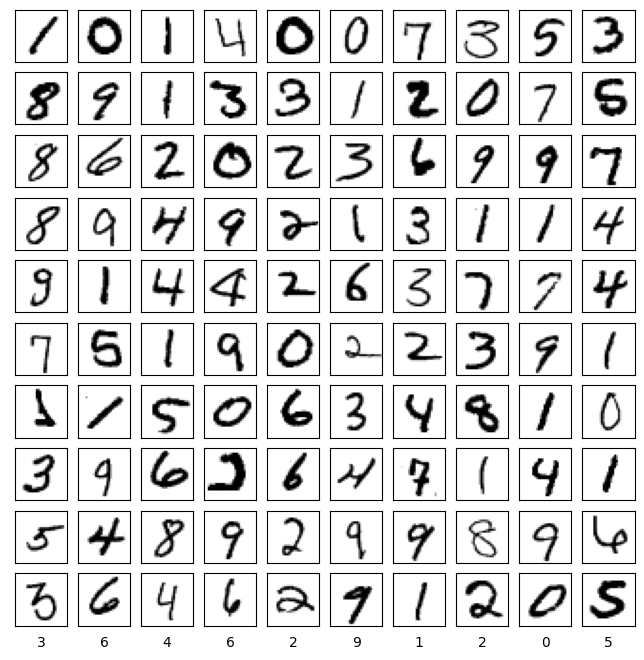

In [12]:
# code to show 100 images
plt.figure(figsize=(8, 8))
for i in range(100):
    plt.subplot(10, 10, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_df.iloc[i, 1:].values.reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(train_df.iloc[i, 0])

In [13]:
# converting number 0 to 256 to 0 to 1
x_train_df = train_df.iloc[:, 1:].values / 256
x_test_df = test_df.iloc[:, :].values / 256
x_train_df[number]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
y_train_df = train_df.iloc[:, 0].values
y_train_df[number]

4

In [15]:
x_train_df.shape, x_test_df.shape

((42000, 784), (28000, 784))

In [16]:
x_train_df[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

### Building and Training Models 🏗️🤖 

In [17]:
x_train, x_test, y_train, y_test = train_test_split(x_train_df, y_train_df, test_size=0.2, random_state=42)

In [18]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.24609375, 0.98828125,
       0.47265625, 0.        , 0.        , 0.        , 0.     

In [19]:
y_train[0]

6

#### Artificial Neural Network (ANN) 🧠🔗

In [20]:
model=keras.Sequential([
    keras.layers.Dense(128, input_shape=(784,), activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [21]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [22]:
history = model.fit(x_train, y_train, epochs=10,
                    batch_size=32, validation_data=(x_test, y_test))

Epoch 1/10
1050/1050 [==============================] - 5s 3ms/step - loss: 0.3892 - accuracy: 0.8842 - val_loss: 0.1976 - val_accuracy: 0.9432
Epoch 2/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.1347 - accuracy: 0.9593 - val_loss: 0.1476 - val_accuracy: 0.9565
Epoch 3/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0957 - accuracy: 0.9709 - val_loss: 0.1349 - val_accuracy: 0.9590
Epoch 4/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0709 - accuracy: 0.9786 - val_loss: 0.1183 - val_accuracy: 0.9656
Epoch 5/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0610 - accuracy: 0.9808 - val_loss: 0.1084 - val_accuracy: 0.9671
Epoch 6/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0456 - accuracy: 0.9852 - val_loss: 0.1037 - val_accuracy: 0.9701
Epoch 7/10
1050/1050 [==============================] - 3s 3ms/step - loss: 0.0390 - accuracy: 0.9869 - val_loss: 0.1093 - val_accuracy:

In [23]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 0s 2ms/step - loss: 0.1435 - accuracy: 0.9694
Test Accuracy: 0.9694047570228577


In [24]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.389249,0.884167,0.197608,0.943214
1,0.134709,0.959286,0.147577,0.956548
2,0.095677,0.970893,0.134940,0.959048
3,0.070933,0.978571,0.118299,0.965595
4,0.061011,0.980833,0.108375,0.967143


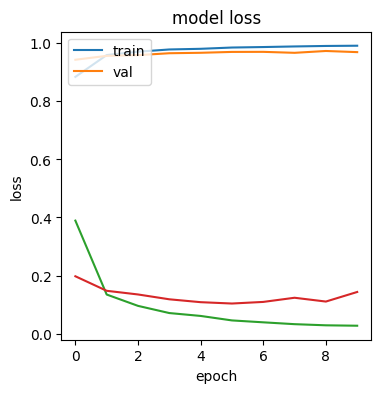

In [25]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [26]:
y_predicted = model.predict(x_test)
y_predicted[0]

263/263 [==============================] - 0s 1ms/step


array([5.7299458e-04, 1.8670982e-02, 1.7067207e-02, 8.0070384e-03,
       2.6155527e-05, 1.0761992e-03, 5.8435631e-04, 4.5013940e-03,
       9.9939209e-01, 7.9844855e-02], dtype=float32)

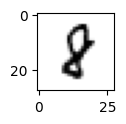

In [27]:
plt.figure(figsize=(1, 1))
plt.imshow(x_test[0].reshape(28, 28), cmap=plt.cm.binary)

In [28]:
np.argmax(y_predicted[0])

8

In [29]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [30]:
y_predicted_labels[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [31]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[800,   0,   2,   2,   0,   1,   6,   0,   4,   1],
       [  0, 903,   2,   1,   0,   0,   0,   0,   3,   0],
       [  0,  11, 798,  12,   3,   1,   1,   8,   8,   4],
       [  0,   2,   0, 917,   0,   6,   0,   1,   6,   5],
       [  2,   1,   2,   0, 806,   1,   7,   4,   1,  15],
       [  0,   1,   0,  15,   0, 675,   4,   1,   2,   4],
       [  3,   3,   0,   0,   0,   7, 771,   0,   1,   0],
       [  0,   2,   2,   4,   2,   1,   0, 867,   2,  13],
       [  0,   5,   2,  17,   2,   6,   2,   4, 792,   5],
       [  1,   1,   0,   8,   5,   5,   0,   4,   0, 814]])>

Text(58.222222222222214, 0.5, 'Truth')

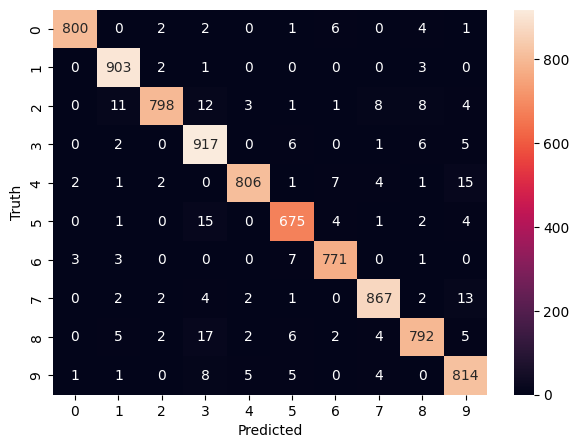

In [32]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Convolutional Neural Network (CNN) 🌐🔍

In [33]:
cnn_model = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [34]:
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [36]:
history = cnn_model.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
              batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10


1050/1050 [==============================] - 17s 16ms/step - loss: 0.0211 - accuracy: 0.9935 - val_loss: 0.0429 - val_accuracy: 0.9860
Epoch 2/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0180 - accuracy: 0.9944 - val_loss: 0.0414 - val_accuracy: 0.9875
Epoch 3/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0155 - accuracy: 0.9951 - val_loss: 0.0598 - val_accuracy: 0.9837
Epoch 4/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.0145 - accuracy: 0.9958 - val_loss: 0.0504 - val_accuracy: 0.9855
Epoch 5/10
1050/1050 [==============================] - 17s 16ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0413 - val_accuracy: 0.9885
Epoch 6/10
1050/1050 [==============================] - 16s 15ms/step - loss: 0.0086 - accuracy: 0.9971 - val_loss: 0.0563 - val_accuracy: 0.9869
Epoch 7/10
1050/1050 [==============================] - 15s 14ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 0.0395 - val_accura

In [37]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.021069,0.993452,0.042929,0.985952
1,0.017974,0.994375,0.041428,0.987500
2,0.015523,0.995060,0.059790,0.983691
3,0.014501,0.995774,0.050386,0.985476
4,0.012810,0.995714,0.041288,0.988452


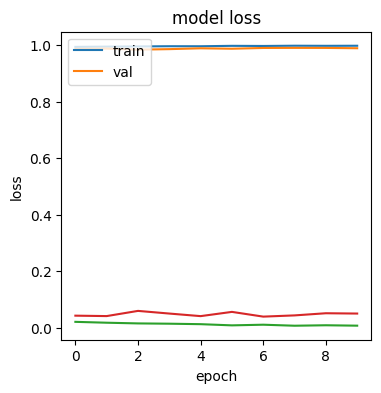

In [38]:
plt.figure(figsize=(4, 4))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.show()

In [39]:
test_loss, test_accuracy = cnn_model.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

  1/263 [..............................] - ETA: 8s - loss: 0.0049 - accuracy: 1.0000

263/263 [==============================] - 1s 6ms/step - loss: 0.0504 - accuracy: 0.9887
Test Accuracy: 0.9886904954910278


In [86]:
y_predicted = cnn_model.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 1s 5ms/step


In [87]:
y_clsses = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [88]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

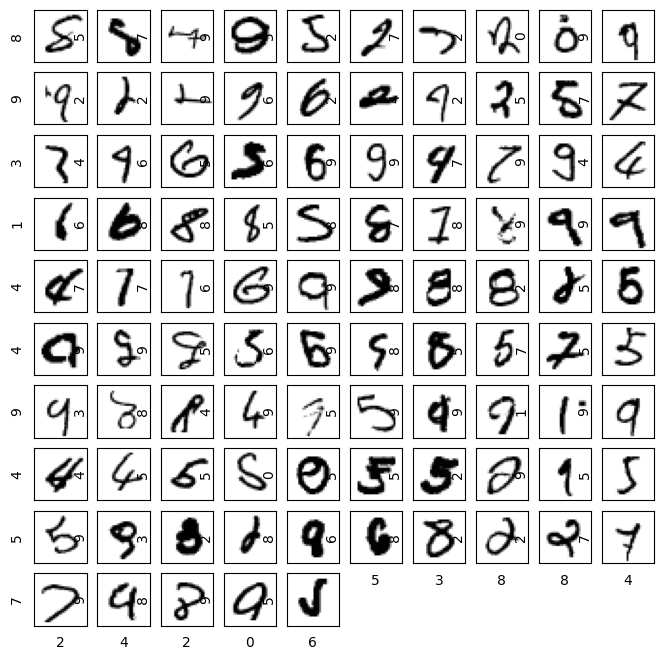

In [89]:
plt.figure(figsize=(8, 8))
count = 0  # Initialize a count variable

for i in range(x_test.shape[0]):
    if y_clsses[i] != y_test[i]:
        count += 1
        if count > 100:
            break  # Exit the loop if more than 100 subplots are created
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y_clsses[i])
        plt.ylabel(y_test[i])

plt.show()

In [90]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_clsses)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[814,   0,   0,   0,   0,   0,   1,   0,   0,   1],
       [  0, 907,   0,   0,   0,   0,   2,   0,   0,   0],
       [  1,   2, 835,   1,   2,   0,   0,   1,   3,   1],
       [  0,   0,   1, 934,   0,   0,   0,   0,   2,   0],
       [  3,   0,   0,   0, 831,   0,   3,   0,   0,   2],
       [  0,   0,   0,  10,   0, 685,   5,   0,   2,   0],
       [  2,   0,   0,   0,   0,   3, 778,   0,   2,   0],
       [  0,   3,   3,   1,   2,   0,   0, 883,   1,   0],
       [  0,   1,   3,   2,   0,   5,   0,   0, 823,   1],
       [  4,   1,   0,   4,   6,   2,   0,   1,   5, 815]])>

Text(58.222222222222214, 0.5, 'Truth')

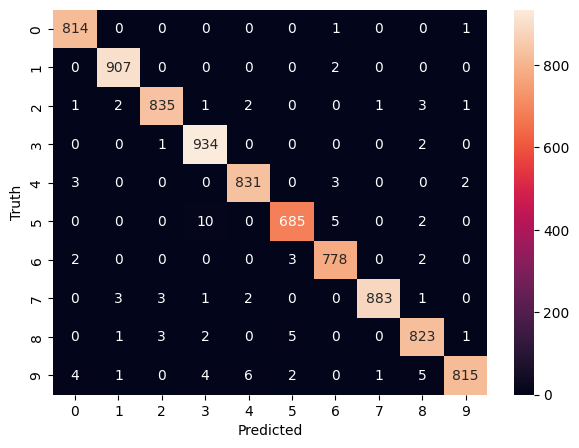

In [91]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

#### Making Predictions 🚀🔮

In [94]:
y_predicted_x_test_df = cnn_model.predict(x_test_df.reshape(-1, 28, 28, 1))
y_predicted_x_test_df

875/875 [==============================] - 5s 5ms/step


array([[2.3289156e-13, 5.6763589e-13, 1.0000000e+00, ..., 2.5510923e-11,
        9.3527399e-09, 5.0393050e-14],
       [1.0000000e+00, 1.6170426e-14, 3.3567218e-10, ..., 6.9933165e-13,
        3.4871861e-09, 8.1436600e-09],
       [2.3914286e-12, 3.5578991e-09, 1.1244959e-07, ..., 3.7344754e-09,
        8.0387900e-07, 9.9999833e-01],
       ...,
       [3.4966793e-19, 1.4846270e-13, 3.8043687e-17, ..., 5.9569483e-13,
        2.4610375e-12, 4.9425935e-20],
       [1.4217093e-09, 7.4395120e-07, 6.8036119e-09, ..., 2.3090115e-07,
        2.0213697e-09, 9.9999678e-01],
       [2.0757051e-15, 1.5126457e-15, 1.0000000e+00, ..., 3.0864596e-13,
        2.2001339e-09, 1.4453602e-15]], dtype=float32)

In [96]:
y_classes_x_test_df = [np.argmax(i) for i in y_predicted_x_test_df]
y_classes_x_test_df[:20]

[2, 0, 9, 0, 3, 7, 0, 3, 0, 3, 5, 7, 4, 0, 4, 3, 3, 1, 9, 0]

In [102]:
result_df = pd.DataFrame({
    "ImageId": submission["ImageId"],
    "Label": y_classes_x_test_df
})

result_df.to_csv("../data/predictions.csv", index=False)

print(result_df.head())

   ImageId  Label
0        1      2
1        2      0
2        3      9
3        4      0
4        5      3


#### Implementing Dropout for Regularization 🕳️🔄

In [77]:
cnn_model_dropout = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [78]:
cnn_model_dropout.compile(optimizer='adam',
                    loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
history = cnn_model_dropout.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
                batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1050/1050 [==============================] - 20s 17ms/step - loss: 1.0603 - accuracy: 0.6521 - val_loss: 0.2512 - val_accuracy: 0.9512
Epoch 2/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.5290 - accuracy: 0.8404 - val_loss: 0.1285 - val_accuracy: 0.9731
Epoch 3/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.4203 - accuracy: 0.8764 - val_loss: 0.1122 - val_accuracy: 0.9746
Epoch 4/10
1050/1050 [==============================] - 17s 17ms/step - loss: 0.3689 - accuracy: 0.8922 - val_loss: 0.0959 - val_accuracy: 0.9786
Epoch 5/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.3365 - accuracy: 0.9030 - val_loss: 0.0837 - val_accuracy: 0.9813
Epoch 6/10
1050/1050 [==============================] - 18s 17ms/step - loss: 0.3110 - accuracy: 0.9115 - val_loss: 0.0894 - val_accuracy: 0.9810
Epoch 7/10
1050/1050 [==============================] - 19s 18ms/step - loss: 0.2904 - accuracy: 0.9155 - val_loss: 0.0816 -

In [80]:
history_df = pd.DataFrame(history.history)
history_df.head()

,loss,accuracy,val_loss,val_accuracy
0,1.060313,0.652083,0.251175,0.951190
1,0.528958,0.840357,0.128499,0.973095
2,0.420325,0.876399,0.112223,0.974643
3,0.368944,0.892173,0.095921,0.978571
4,0.336522,0.903036,0.083726,0.981310


In [81]:
test_loss, test_accuracy = cnn_model_dropout.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)

263/263 [==============================] - 2s 6ms/step - loss: 0.0759 - accuracy: 0.9850


In [82]:
y_predicted = cnn_model_dropout.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 2s 6ms/step


In [83]:
y_clsses = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [84]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

101


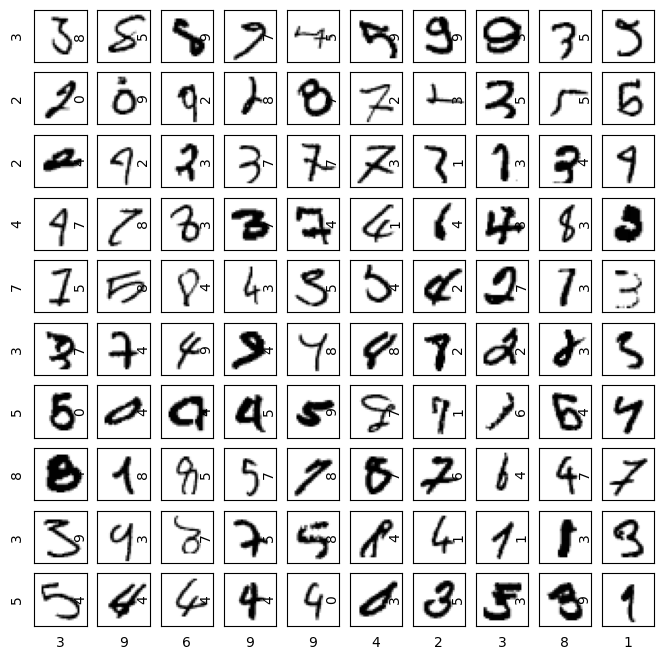

In [85]:
plt.figure(figsize=(8, 8))
count = 0  # Initialize a count variable

for i in range(x_test.shape[0]):
    if y_clsses[i] != y_test[i]:
        count += 1
        if count > 100:
            print(count)
            break  # Exit the loop if more than 100 subplots are created
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y_clsses[i])
        plt.ylabel(y_test[i])

plt.show()

#### Data Augmentation for Improved Generalization 🔄📸

In [65]:
data_augmentation = keras.Sequential([
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.RandomContrast(0.1)
])

In [66]:
model_data_augmentation = models.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=(3, 3),
                  activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [67]:
model_data_augmentation.compile(optimizer='adam',
                                loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [68]:
history =  model_data_augmentation.fit(x_train.reshape(-1, 28, 28, 1), y_train, epochs=10,
                            batch_size=32, validation_data=(x_test.reshape(-1, 28, 28, 1), y_test))

Epoch 1/10
1050/1050 [==============================] - 42s 32ms/step - loss: 0.4141 - accuracy: 0.8650 - val_loss: 0.1197 - val_accuracy: 0.9642
Epoch 2/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.1382 - accuracy: 0.9574 - val_loss: 0.0873 - val_accuracy: 0.9740
Epoch 3/10
1050/1050 [==============================] - 35s 33ms/step - loss: 0.1037 - accuracy: 0.9679 - val_loss: 0.0754 - val_accuracy: 0.9755
Epoch 4/10
1050/1050 [==============================] - 39s 37ms/step - loss: 0.0836 - accuracy: 0.9740 - val_loss: 0.0614 - val_accuracy: 0.9812
Epoch 5/10
1050/1050 [==============================] - 37s 35ms/step - loss: 0.0780 - accuracy: 0.9762 - val_loss: 0.0637 - val_accuracy: 0.9818
Epoch 6/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0697 - accuracy: 0.9788 - val_loss: 0.0579 - val_accuracy: 0.9825
Epoch 7/10
1050/1050 [==============================] - 33s 32ms/step - loss: 0.0582 - accuracy: 0.9812 - val_loss: 0.0549 -

In [69]:
test_loss, test_accuracy = model_data_augmentation.evaluate(x_test.reshape(-1, 28, 28, 1), y_test)
print(f"Test Accuracy: {test_accuracy}")

263/263 [==============================] - 2s 9ms/step - loss: 0.0459 - accuracy: 0.9871
Test Accuracy: 0.9871428608894348


In [70]:
y_predicted = model_data_augmentation.predict(x_test.reshape(-1, 28, 28, 1))

263/263 [==============================] - 2s 8ms/step


In [71]:
y_classes = [np.argmax(i) for i in y_predicted]
y_clsses[:20]

[8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4]

In [72]:
y_test[:20]

array([8, 1, 9, 9, 8, 6, 2, 2, 7, 1, 6, 3, 1, 2, 7, 4, 3, 3, 6, 4],
      dtype=int64)

In [73]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_clsses)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[814,   0,   0,   0,   0,   0,   1,   0,   0,   1],
       [  0, 907,   0,   0,   0,   0,   2,   0,   0,   0],
       [  1,   2, 835,   1,   2,   0,   0,   1,   3,   1],
       [  0,   0,   1, 934,   0,   0,   0,   0,   2,   0],
       [  3,   0,   0,   0, 831,   0,   3,   0,   0,   2],
       [  0,   0,   0,  10,   0, 685,   5,   0,   2,   0],
       [  2,   0,   0,   0,   0,   3, 778,   0,   2,   0],
       [  0,   3,   3,   1,   2,   0,   0, 883,   1,   0],
       [  0,   1,   3,   2,   0,   5,   0,   0, 823,   1],
       [  4,   1,   0,   4,   6,   2,   0,   1,   5, 815]])>

Text(58.222222222222214, 0.5, 'Truth')

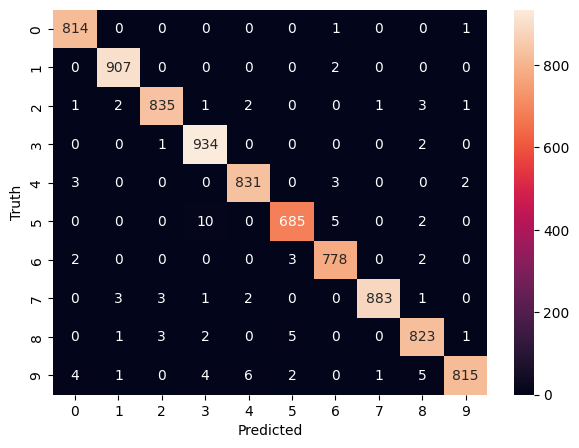

In [74]:
import seaborn as sn
plt.figure(figsize = (7,5))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

101


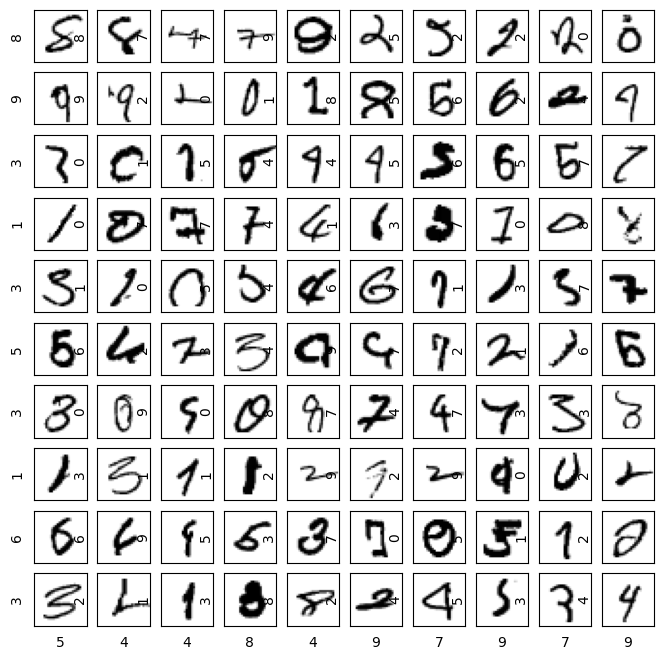

In [76]:
plt.figure(figsize=(8, 8))
count = 0  # Initialize a count variable

for i in range(x_test.shape[0]):
    if y_classes[i] != y_test[i]:
        count += 1
        if count > 100:
            print(count)
            break  # Exit the loop if more than 100 subplots are created
        plt.subplot(10, 10, count)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(x_test[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.xlabel(y_classes[i])
        plt.ylabel(y_test[i])

plt.show()

### Conclusion 🎉🏁

#### **Score: 0.9876**